In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Part 1: Load Example Dataset

In [6]:
data1 = loadmat("./ex8data1.mat")
X = data1["X"]
Xval = data1["Xval"]
yval = data1["yval"]

Text(0, 0.5, 'Throughput (mb/s)')

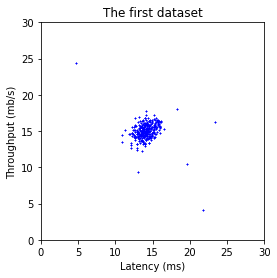

In [29]:
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], marker="x", color="b", s=1)
plt.title("The first dataset")
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

## Part 2: Estimate the Dataset Statistics

In [71]:
def estimateGaussian(X):
    """Estimate the parameters of a Gaussia distribution
    given datset X
    """
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

def multivariateGaussian(X, mu, sigma2):
    """Compute the probability density function of the 
    multivariate gaussian distribution
    """
    if sigma2.ndim == 1:
        sigma2 = np.diag(sigma2)
    d = len(mu)
    p = np.power(2*np.pi, -d/2) * np.power(np.linalg.det(sigma2), -0.5) * \
        np.exp(-0.5 * (X-mu)@np.linalg.inv(sigma2)@(X-mu).T)
    p = np.diag(p)
    return p

In [72]:
mu, sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)

(70, 70)


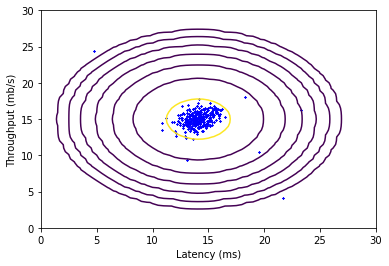

In [76]:
def visualizeFit(X, mu, sigma2):
    x1 = np.arange(0, 35, 0.5)
    x2 = np.arange(0, 35, 0.5)
    X1, X2 = np.meshgrid(x1, x2)
    print(X2.shape)
    Z = multivariateGaussian(np.c_[X1.flatten(), X2.flatten()], mu, sigma2)
    Z = Z.reshape(X1.shape)
    
    plt.scatter(X[:, 0], X[:, 1], marker="x", color="b", s=2)
    plt.contour(X1 ,X2, Z, np.power(10, 1.*np.arange(-20, 0, 3)))
    plt.xlim([0, 30])
    plt.ylim([0, 30])
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/s)")
visualizeFit(X, mu, sigma2)

## Part 3: Find Outliers

In [133]:
pval = multivariateGaussian(Xval, mu, sigma2)

In [152]:
def selectThreshold(yval, pval):
    """Find the best threshold to use for selecting outliers
    """
    bestEpsilon = 0.
    bestF1 = 0.
    F1 = 0.
    stepsize = (max(pval) - min(pval)) / 1000
    yval = yval.squeeze()
    for epsilon in np.arange(min(pval), max(pval), stepsize):
        predictions = pval < epsilon
        tp = 1.*np.sum((predictions == 1) & (yval == 1))
        fp = 1.*np.sum((predictions == 1) & (yval == 0))
        fn = 1.*np.sum((predictions == 0) & (yval == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
            
    return bestEpsilon, bestF1

In [156]:
epsilon, F1 = selectThreshold(yval, pval)
print(f"epsilon={epsilon}")
print(f"F1={F1}")

epsilon=8.990852779269495e-05
F1=0.8750000000000001


C:\Users\zchen\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0, 0.5, 'Throughput (mb/s)')

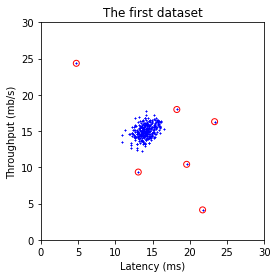

In [167]:
outliers = (p<epsilon)
plt.figure(figsize=(4, 4))
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', c='None', edgecolors='r', linewidth=1)
plt.scatter(X[:, 0], X[:, 1], marker="x", color="b", s=1)
plt.title("The first dataset")
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

## Part 4: Multidimensional Outliers

In [170]:
data2 = loadmat("./ex8data2.mat")
X = data2["X"]
Xval = data2["Xval"]
yval = data2["yval"]
mu, sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)

C:\Users\zchen\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [171]:
print(f"epsilon={epsilon}")
print(f"F1={F1}")

epsilon=1.3772288907613575e-18
F1=0.6153846153846154
